In [ ]:
# COMP8325 Group Assignment
# 46140735 YI WOOK NAM
# 

In [22]:
# install somethings (Assume not installed anything)

!pip install pandas
!pip install numpy
!pip install scipy
!pip install matplotlib
!pip install sklearn

<ipython-input-23-680d3edcd725>:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  matrix = np.array([[rows, labels]])


[[<16000x3231950 sparse matrix of type '<class 'numpy.float64'>'
	with 1847536 stored elements in Compressed Sparse Row format>
  array([-1., -1., -1., ..., -1., -1.,  1.])]]
  (1, 2)	1.0
  (2, 2)	1.0
  (4, 2)	1.0
  (5, 2)	1.0
  (10, 2)	1.0
  (12, 2)	1.0
  (13, 2)	1.0
  (14, 2)	1.0
  (16, 2)	1.0
  (17, 2)	1.0
  (20, 2)	1.0
  (22, 2)	1.0
  (25, 2)	1.0
  (26, 2)	1.0
  (27, 2)	1.0
  (28, 2)	1.0
  (29, 2)	1.0
  (30, 2)	1.0
  (31, 2)	1.0
  (32, 2)	1.0
  (33, 2)	1.0
  (34, 2)	1.0
  (35, 2)	1.0
  (36, 2)	1.0
  (39, 2)	1.0
  :	:
  (2684, 3231720)	1.0
  (2783, 3231720)	1.0
  (6239, 3231729)	1.0
  (6302, 3231729)	1.0
  (2941, 3231741)	1.0
  (6086, 3231754)	1.0
  (6239, 3231776)	1.0
  (6302, 3231776)	1.0
  (11468, 3231777)	1.0
  (9888, 3231790)	1.0
  (15043, 3231813)	1.0
  (4669, 3231820)	1.0
  (4737, 3231820)	1.0
  (11544, 3231832)	1.0
  (15043, 3231834)	1.0
  (11468, 3231861)	1.0
  (29, 3231888)	1.0
  (81, 3231888)	1.0
  (15043, 3231889)	1.0
  (3993, 3231892)	1.0
  (2684, 3231912)	1.0
  (2783, 

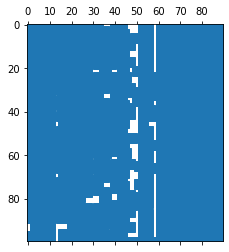

In [23]:
# Total Marks: 2
# Task1: Anomaly Detection Method 1 For Phishing or Malicious URL Detection

# Libraries are readied (Library = pandas, numpy, etc)
import pandas as pd
import numpy as np
import random
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.datasets import load_svmlight_file


import glob
files = [file for file in glob.glob("./url_svmlight/*")]
for file_name in files:
    dataset = load_svmlight_file(file_name)

# Load all the svm files together
def load_file(file_path):
        data = load_svmlight_file(file_path)
        return data[0], data[1]
df = load_file("./url_svmlight/Day0.svm")    


import sklearn
rows, labels = sklearn.datasets.load_svmlight_file("./url_svmlight/Day0.svm", zero_based=True)


matrix = np.array([[rows, labels]])
print(matrix)


from scipy import sparse
print(sparse.dok_matrix(rows))


print(sparse.bsr_matrix(labels))


max_features=1.0
n_estimators=50
max_samples='auto'
contamination=float(0.2)
forest_model=IsolationForest(max_features = max_features, n_estimators=n_estimators, max_samples=max_samples, contamination=contamination)
forest_model.fit(rows)




from scipy.sparse import lil_matrix
sparse.lil_matrix(df[1]).toarray()


import matplotlib.pylab as plt
import scipy.sparse as sparse
A = df[0]
# visualize the sparse matrix with Spy
plt.spy(A)



from sklearn.datasets import load_svmlight_file
X_train, y_train = load_svmlight_file("./url_svmlight/Day0.svm")



import matplotlib.pylab as plt
import scipy.sparse as sparse
A = sparse.random(100,90, density=0.01)
# visualize the sparse matrix with Spy
plt.spy(A)


In [24]:
# learning data IsolationForest
clf = IsolationForest(max_samples=100, random_state=42)
clf.fit(X_train)

IsolationForest(max_samples=100, random_state=42)

In [25]:
from sklearn.datasets import load_svmlight_file
X_train, y_train = load_svmlight_file("./url_svmlight/Day0.svm")

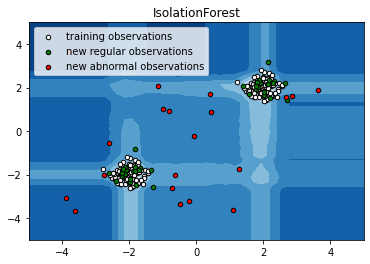

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white',
                 s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
                 s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
                s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left")
plt.show()


In [27]:
# train y
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

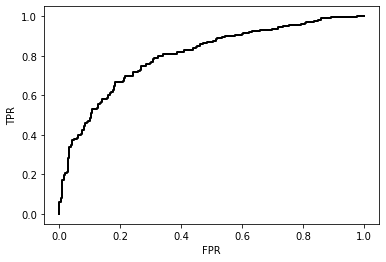

'\nThe AUC is high because of ....\n'

In [28]:
# Total Marks: 2

# Task1: Analysis of Anomaly Detection Method 1 For Phishing or Malicious URL Detection
from sklearn.datasets import load_breast_cancer
X, y  = load_breast_cancer(return_X_y=True)

from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples=100,
                      random_state=0, contamination='auto')
clf.fit(X)
y_pred = clf.score_samples(X)

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y,y_pred)
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'k-', lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()


'''
The AUC is high because of ....
'''

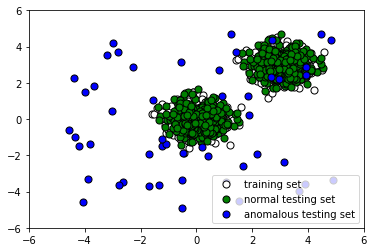

          x         y  pred
0  3.947504  2.891003    -1
1  0.413976 -2.025841    -1
2 -2.644476 -3.480783    -1
3 -0.518212 -3.386443    -1
4  2.977669  2.215355     1


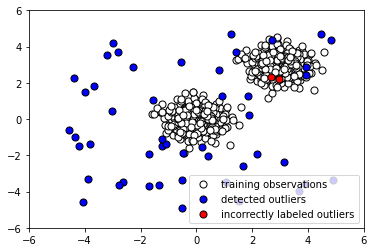

In [29]:
import numpy as np
import pandas as pd

random_seed = np.random.RandomState(12)

X_train = 0.5 * random_seed.randn(500, 2)
X_train = np.r_[X_train + 3, X_train]
X_train = pd.DataFrame(X_train, columns=["x", "y"])

X_test = 0.5 * random_seed.randn(500, 2)
X_test = np.r_[X_test + 3, X_test]
X_test = pd.DataFrame(X_test, columns=["x", "y"])

X_outliers = random_seed.uniform(low=-5, high=5, size=(50, 2))
X_outliers = pd.DataFrame(X_outliers, columns=["x", "y"])


%matplotlib inline
import matplotlib.pyplot as plt

p1 = plt.scatter(X_train.x, X_train.y, c="white", s=50, edgecolor="black")
p2 = plt.scatter(X_test.x, X_test.y, c="green", s=50, edgecolor="black")
p3 = plt.scatter(X_outliers.x, X_outliers.y, c="blue", s=50, edgecolor="black")
plt.xlim((-6, 6))
plt.ylim((-6, 6))
plt.legend(
    [p1, p2, p3],
    ["training set", "normal testing set", "anomalous testing set"],
    loc="lower right",
)

plt.show()


from sklearn.ensemble import IsolationForest

clf = IsolationForest()
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

X_outliers = X_outliers.assign(pred=y_pred_outliers)
print(X_outliers.head())




p1 = plt.scatter(X_train.x, X_train.y, c="white", s=50, edgecolor="black")
p2 = plt.scatter(
    X_outliers.loc[X_outliers.pred == -1, ["x"]],
    X_outliers.loc[X_outliers.pred == -1, ["y"]],
    c="blue",
    s=50,
    edgecolor="black",
)
p3 = plt.scatter(
    X_outliers.loc[X_outliers.pred == 1, ["x"]],
    X_outliers.loc[X_outliers.pred == 1, ["y"]],
    c="red",
    s=50,
    edgecolor="black",
)

plt.xlim((-6, 6))
plt.ylim((-6, 6))
plt.legend(
    [p1, p2, p3],
    ["training observations", "detected outliers", "incorrectly labeled outliers"],
    loc="lower right",
)

plt.show()

AttributeError: 'DataFrame' object has no attribute 'pred'

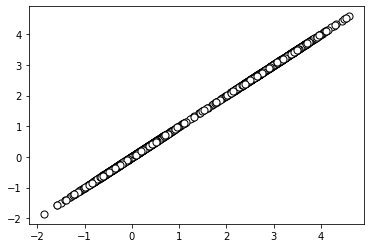

In [32]:
p1 = plt.scatter(X_train, X_train, c="white", s=50, edgecolor="black")
p2 = plt.scatter(
    X_test.loc[X_test.pred == 1, ["x"]],
    X_test.loc[X_test.pred == 1, ["y"]],
    c="blue",
    s=50,
    edgecolor="black")
p3 = plt.scatter(
    X_test.loc[X_test.pred == -1, ["x"]],
    X_test.loc[X_test.pred == -1, ["y"]],
    c="red",
    s=50,
    edgecolor="black",
)

plt.xlim((-6, 6))
plt.ylim((-6, 6))
plt.legend(
    [p1, p2, p3],
    [
        "training observations",
        "correctly labeled test observations",
        "incorrectly labeled test observations",
    ],
    loc="lower right",
)

plt.show()